In [1704]:
import pandas as pd
import numpy as np

### Load Data

In [1705]:
df1 = pd.read_csv("transaction_dataset.csv") #9841 rows
df1.drop(columns=['Unnamed: 0', 'Index'], inplace = True) # drop the first two columns cause unique
df1.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

In [1706]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df1.select_dtypes('O').columns.astype('category')
df1[categories]

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


### TRAIN-TEST SPLIT 
done before data preprocessing to avoid data leakage

In [1707]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["FLAG"])
y = df1['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,train_size=0.90,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=42,train_size=0.90,stratify=y_train)

In [1708]:
y_train.value_counts()

0    6205
1    1765
Name: FLAG, dtype: int64

Data is imbalanced

In [1709]:
X_train.describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,7970.000000,7970.000000,7.970000e+03,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,...,7.289000e+03,7.289000e+03,7.289000e+03,7.289000e+03,7.289000e+03,7289.0,7289.0,7289.0,7289.000000,7289.000000
mean,5270.236196,8034.275256,2.185862e+05,114.220326,164.464868,3.310916,29.234881,25.020201,45.528564,565.926014,...,1.521950e+08,5.135520e+06,1.445887e+04,1.600862e+07,7.802712e+06,0.0,0.0,0.0,1.425436,4.893401
std,21886.934636,23504.629985,3.234893e+05,742.917038,939.987266,110.336925,293.684580,246.043779,353.399289,14163.065812,...,1.171666e+10,2.379399e+08,1.171487e+06,1.311960e+09,6.576787e+08,0.0,0.0,0.0,7.046339,17.533973
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.160975e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001158,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,17.935000,482.220000,4.710324e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.098921,5.995461,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,624.970000,5345.855000,3.036633e+05,11.000000,26.000000,0.000000,5.000000,3.000000,2.000000,66.496672,...,9.900000e+01,3.036071e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,430287.670000,482175.490000,1.954861e+06,10000.000000,9999.000000,6453.000000,9999.000000,6711.000000,10000.000000,800000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


From the above, the mean of some of these variables which should be non-negative(>=0) are 0. This highly suggests that the values of these columns are 0. To try and identify these variables, run through the columns(excluding the label itself) and print out the ones with 2 or less than 1 values.

In [1710]:
for c in X_train.columns:
    if X_train[c].unique().__len__() <= 2 and c!='FLAG':
        print(c,'unique values:', df1[c].unique())

min value sent to contract unique values: [0.   0.02 0.01]
 ERC20 avg time between sent tnx unique values: [ 0. nan]
 ERC20 avg time between rec tnx unique values: [ 0. nan]
 ERC20 avg time between rec 2 tnx unique values: [ 0. nan]
 ERC20 avg time between contract tnx unique values: [ 0. nan]
 ERC20 min val sent contract unique values: [ 0. nan]
 ERC20 max val sent contract unique values: [ 0. nan]
 ERC20 avg val sent contract unique values: [ 0. nan]


In [1711]:
no_var = X_train.var() == 0
cols_zero_var = X_train.var()[no_var].index
cols_zero_var

/var/folders/96/5lhdzdnj22v9lw7wxwdddk0r0000gn/T/ipykernel_2211/2286572765.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  no_var = X_train.var() == 0
/var/folders/96/5lhdzdnj22v9lw7wxwdddk0r0000gn/T/ipykernel_2211/2286572765.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cols_zero_var = X_train.var()[no_var].index


Index([' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',
       ' ERC20 max val sent contract', ' ERC20 avg val sent contract'],
      dtype='object')

This also explains why the variance of these variables are 0. Drop these three columns as they are most likely actually supposed to be null for every row(0 used to replace NaN in certained rows when the person was keying in the data), meaning they give us no information at all.

In [1712]:
X_train.drop(columns=cols_zero_var, inplace=True)

#do the same for val and test
X_val.drop(columns=cols_zero_var, inplace=True)
X_test.drop(columns=cols_zero_var, inplace=True)

In [1713]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Notice how a lot of the rows with na values are actually flagged as fraud

Observe how only columns involving data related to ERC20 is missing.
##### What is ERC20?
ERC-20 allows <b>different</b> smart-contract enabled tokens a way to be exchanged. Tokens, in this regard, are a representation of an asset, right, ownership, access, cryptocurrency, or anything else that is not unique in and of itself but can be transferred. The standard allows tokens representing one of these factors—along with smart contracts—to be exchanged for a token that represents another. Smart contracts are conditions written into the coding that execute different aspects of a transaction between parties.

ERC-20 guides the creation of new tokens on the Ethereum blockchain so that they are interchangeable with other tokens used within smart contracts.

In [1714]:
cols_NA_counts = X_train.isnull().sum()
cols_NA_counts

Address                                                   0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [1715]:
cols_with_NA = cols_NA_counts.where(lambda x : x > 0).dropna()
print(cols_with_NA)

 Total ERC20 tnxs                   681.0
 ERC20 total Ether received         681.0
 ERC20 total ether sent             681.0
 ERC20 total Ether sent contract    681.0
 ERC20 uniq sent addr               681.0
 ERC20 uniq rec addr                681.0
 ERC20 uniq sent addr.1             681.0
 ERC20 uniq rec contract addr       681.0
 ERC20 min val rec                  681.0
 ERC20 max val rec                  681.0
 ERC20 avg val rec                  681.0
 ERC20 min val sent                 681.0
 ERC20 max val sent                 681.0
 ERC20 avg val sent                 681.0
 ERC20 uniq sent token name         681.0
 ERC20 uniq rec token name          681.0
 ERC20 most sent token type         689.0
 ERC20_most_rec_token_type          697.0
dtype: float64


In [1716]:
erc20_cols = cols_with_NA.index
X_train[X_train[erc20_cols].isna().all(axis=1)]

,Address,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7895,0x1982b0e96a0375e5b570e8e466d423a37af34b43,0.00,29115.98,174695.90,0,6,1,4,0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9369,0xc8c3234aea55a5f746b2ae585a849ba0bfa57785,0.00,0.00,0.00,0,0,0,0,0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9114,0xa8454096f4a18e0252b411f670b3dd9d21465e75,362.62,191.23,2617.68,3,8,0,8,1,0.01000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7883,0x18502a1f6ccd21ae49d932783d2814cca62591d9,0.00,0.00,0.00,0,1,0,1,0,0.13000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,0x79a9e902cfbe87fa5065905293992c15de7f6095,8406.13,25.60,42209.88,5,7,0,6,4,0.20000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,0x520c7dd3d265b6edd88c623d4c9eddacbf082ea6,5060.24,2.62,30366.68,6,2,0,2,6,0.52946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8865,0x8a82571f81d1af061dd995fd972930514898c103,0.00,0.00,0.00,0,0,0,0,0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8598,0x6a60dc30ef7e29abbd5a92b7697270dbd2115c18,0.00,0.00,0.00,0,0,0,0,0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8326,0x4985a8d068a9cac4b81faaafb8d4516ae46dd768,2273.32,2618.88,14331.05,4,2,0,1,4,2.62700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1717]:
y_train[X_train[X_train[erc20_cols].isna().all(axis=1)].index].value_counts()

1    681
Name: FLAG, dtype: int64

- Based on these information, we can create a new feature that is 1 if that row NA value for ALL variables related to ERC20 and 0 if it doesn't.
- Name of the feature can be called "ERC-20 info all NA" since it just so happens that the NA values lie in features that give information about transactions involving ERC-20 compliant tokens

In [1718]:
X_train['ERC-20 info all NA'] = X_train.isnull().any(axis=1).apply(lambda x: int(x))

#do the same on test and val
X_val['ERC-20 info all NA'] = X_val.isnull().any(axis=1).apply(lambda x: int(x))
X_test['ERC-20 info all NA'] = X_test.isnull().any(axis=1).apply(lambda x: int(x))

#### Take a look at correlations (end up quite useless except for one variable)

In [1719]:
X_train.corrwith(y_train).dropna().apply(lambda x: (abs(x),'+ve' if x > 0 else '-ve')).sort_values(ascending=False)

ERC-20 info all NA                                         (0.5597332830831312, +ve)
Time Diff between first and last (Mins)                   (0.26757920080975217, -ve)
Avg min between received tnx                              (0.11371327379228209, -ve)
total transactions (including tnx to create contract      (0.10007944845928245, -ve)
Sent tnx                                                  (0.07840920987127568, -ve)
Received Tnx                                              (0.07827845647605094, -ve)
avg val sent                                             (0.055097545264271505, -ve)
Unique Sent To Addresses                                  (0.04688515414456012, -ve)
Unique Received From Addresses                           (0.028811750374300622, -ve)
 ERC20 min val sent                                      (0.028329298048639033, +ve)
 ERC20 avg val sent                                       (0.02796717738240073, +ve)
 ERC20 max val sent                                      (0.02790

Fraud transactions have shorter average time gap between the first and last transaction

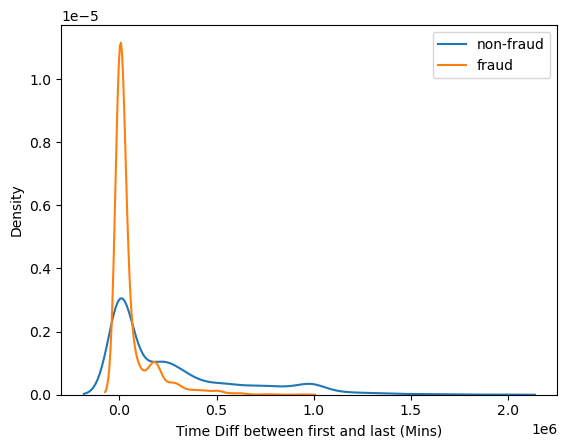

In [1720]:
sns.kdeplot(data = X_train[y_train==0], x='Time Diff between first and last (Mins)')
sns.kdeplot(data = X_train[y_train==1], x='Time Diff between first and last (Mins)')
plt.legend(['non-fraud','fraud'])
plt.show()

##### Look at the dimension of each feature

In [1721]:
X_train.nunique()

Address                                                 7953
Avg min between sent tnx                                4209
Avg min between received tnx                            5041
Time Diff between first and last (Mins)                 6451
Sent tnx                                                 568
Received Tnx                                             651
Number of Created Contracts                               18
Unique Received From Addresses                           223
Unique Sent To Addresses                                 228
min value received                                      3800
max value received                                      5140
avg val received                                        5500
min val sent                                            3897
max val sent                                            5463
avg val sent                                            4792
min value sent to contract                                 2
max val sent to contract

Drop the Address as there are too many unique values which will cause overfitting

In [1722]:
X_train.drop(columns=['Address'],inplace=True) #drop address as it is a categorical variable with too many unique values

#do the same for val and test
X_val.drop(columns=['Address'],inplace=True) 
X_test.drop(columns=['Address'],inplace=True)

Identify the numeric and categorical columns

In [1723]:
cat_cols = list(X_train.columns[X_train.dtypes == 'object'])
num_cols = list(X_train.columns[X_train.dtypes != 'object'])
num_cols.remove('ERC-20 info all NA')
cat_cols.append('ERC-20 info all NA')

### Handling NA numerical features

In [1724]:
X_train[num_cols].skew()

Avg min between sent tnx                                 8.261360
Avg min between received tnx                             6.893560
Time Diff between first and last (Mins)                  1.799347
Sent tnx                                                10.564980
Received Tnx                                             8.828238
Number of Created Contracts                             41.362013
Unique Received From Addresses                          19.318194
Unique Sent To Addresses                                17.104501
min value received                                      22.287860
max value received                                      43.721034
avg val received                                        87.048746
min val sent                                            66.186123
max val sent                                            54.916319
avg val sent                                            25.983041
min value sent to contract                              89.274856
max val se

In [1725]:
X_train[num_cols].kurtosis()

Avg min between sent tnx                                  92.250134
Avg min between received tnx                              71.225893
Time Diff between first and last (Mins)                    2.865783
Sent tnx                                                 123.169076
Received Tnx                                              83.014478
Number of Created Contracts                             1950.728942
Unique Received From Addresses                           479.214439
Unique Sent To Addresses                                 338.595202
min value received                                       584.829730
max value received                                      2085.531423
avg val received                                        7701.728472
min val sent                                            4832.204647
max val sent                                            3493.902537
avg val sent                                            1012.456895
min value sent to contract                      

DATA IS NOT NORMALLY DISTRIBUTED, impute NA values with median not mean as median is more robust

In [1726]:
X_train[num_cols].isnull().sum() > 0

Avg min between sent tnx                                False
Avg min between received tnx                            False
Time Diff between first and last (Mins)                 False
Sent tnx                                                False
Received Tnx                                            False
Number of Created Contracts                             False
Unique Received From Addresses                          False
Unique Sent To Addresses                                False
min value received                                      False
max value received                                      False
avg val received                                        False
min val sent                                            False
max val sent                                            False
avg val sent                                            False
min value sent to contract                              False
max val sent to contract                                False
avg valu

In [1727]:
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())

#do the same for val and test but NOTE: the median must be the median of the X_train
X_val[num_cols] = X_val[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].median())

In [1728]:
X_train[num_cols].isnull().sum() > 0

Avg min between sent tnx                                False
Avg min between received tnx                            False
Time Diff between first and last (Mins)                 False
Sent tnx                                                False
Received Tnx                                            False
Number of Created Contracts                             False
Unique Received From Addresses                          False
Unique Sent To Addresses                                False
min value received                                      False
max value received                                      False
avg val received                                        False
min val sent                                            False
max val sent                                            False
avg val sent                                            False
min value sent to contract                              False
max val sent to contract                                False
avg valu

### Analyse the Correlation matrix of numerical values

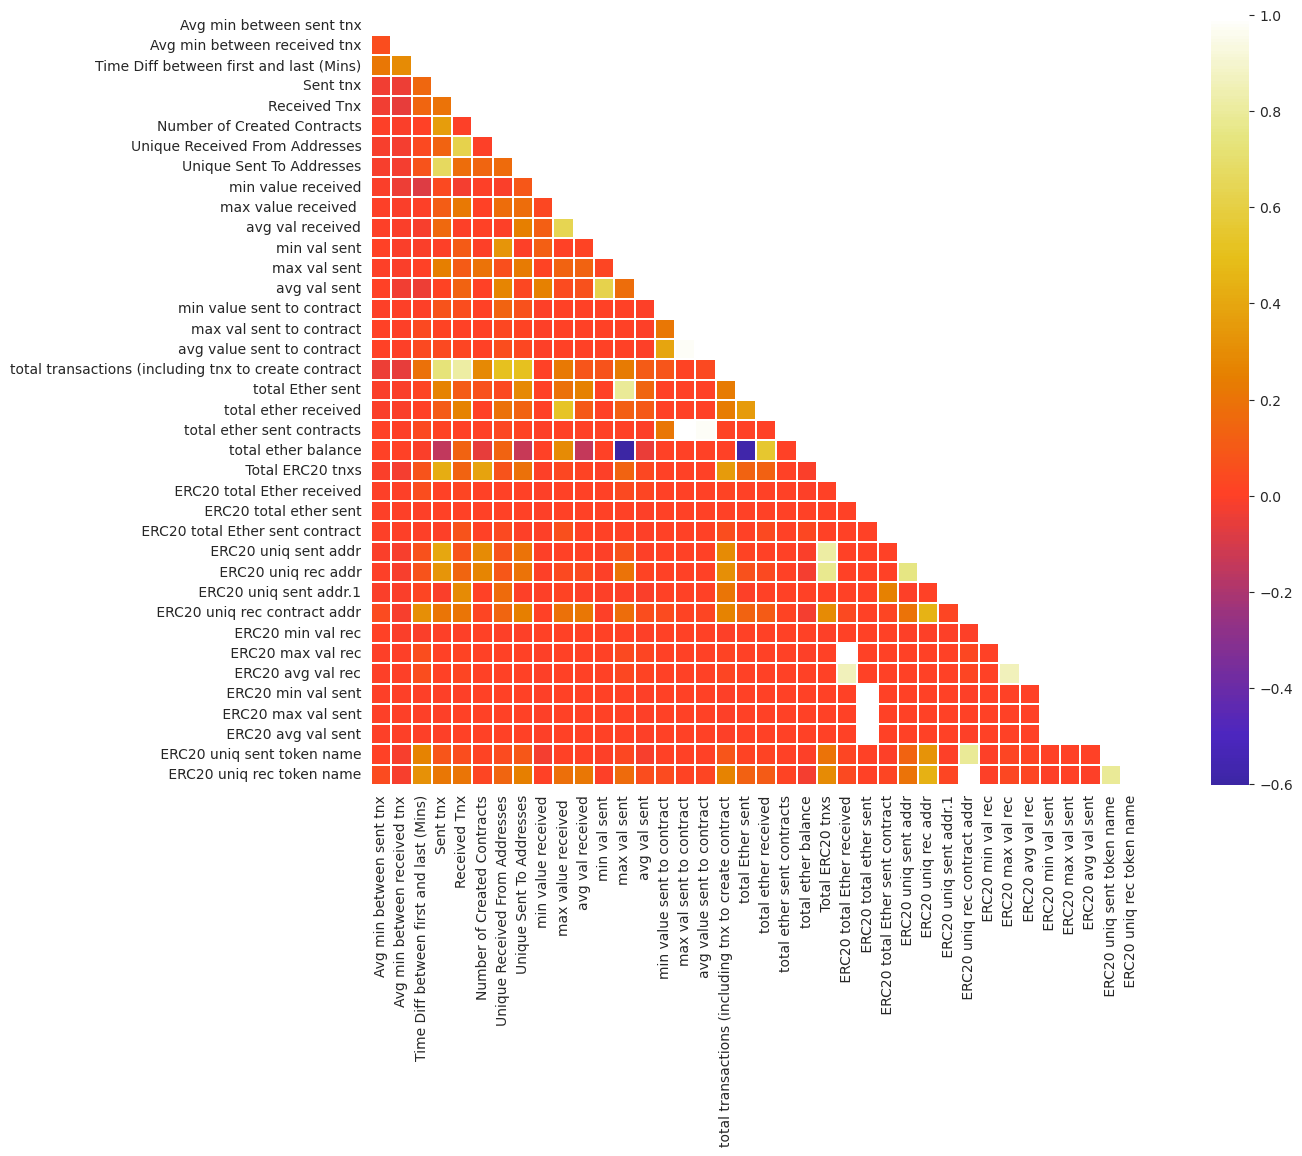

In [1729]:
corr = X_train[num_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

For every two numerical features that are highly correlated with each other and FLAG is not one of it, choose one of the two to drop

In [1730]:
drop = [' ERC20 total ether sent',' ERC20 total Ether received', 'total ether sent contracts',' ERC20 uniq rec contract addr',
' ERC20 min val sent','avg value sent to contract', ' ERC20 avg val sent', 'Received Tnx', ' ERC20 max val rec',
' ERC20 uniq sent token name', 'total transactions (including tnx to create contract',' Total ERC20 tnxs','total ether received',
'Unique Sent To Addresses','min val sent',' ERC20 uniq sent addr.1','total ether balance','max val sent'] #dropping 17 cols
X_train.drop(columns=drop, inplace=True, axis=1)

#update the num_cols
num_cols = [x for x in num_cols if x not in drop]

#do the same for val and test
X_val.drop(columns=drop, inplace=True, axis=1)
X_test.drop(columns=drop, inplace=True, axis=1)

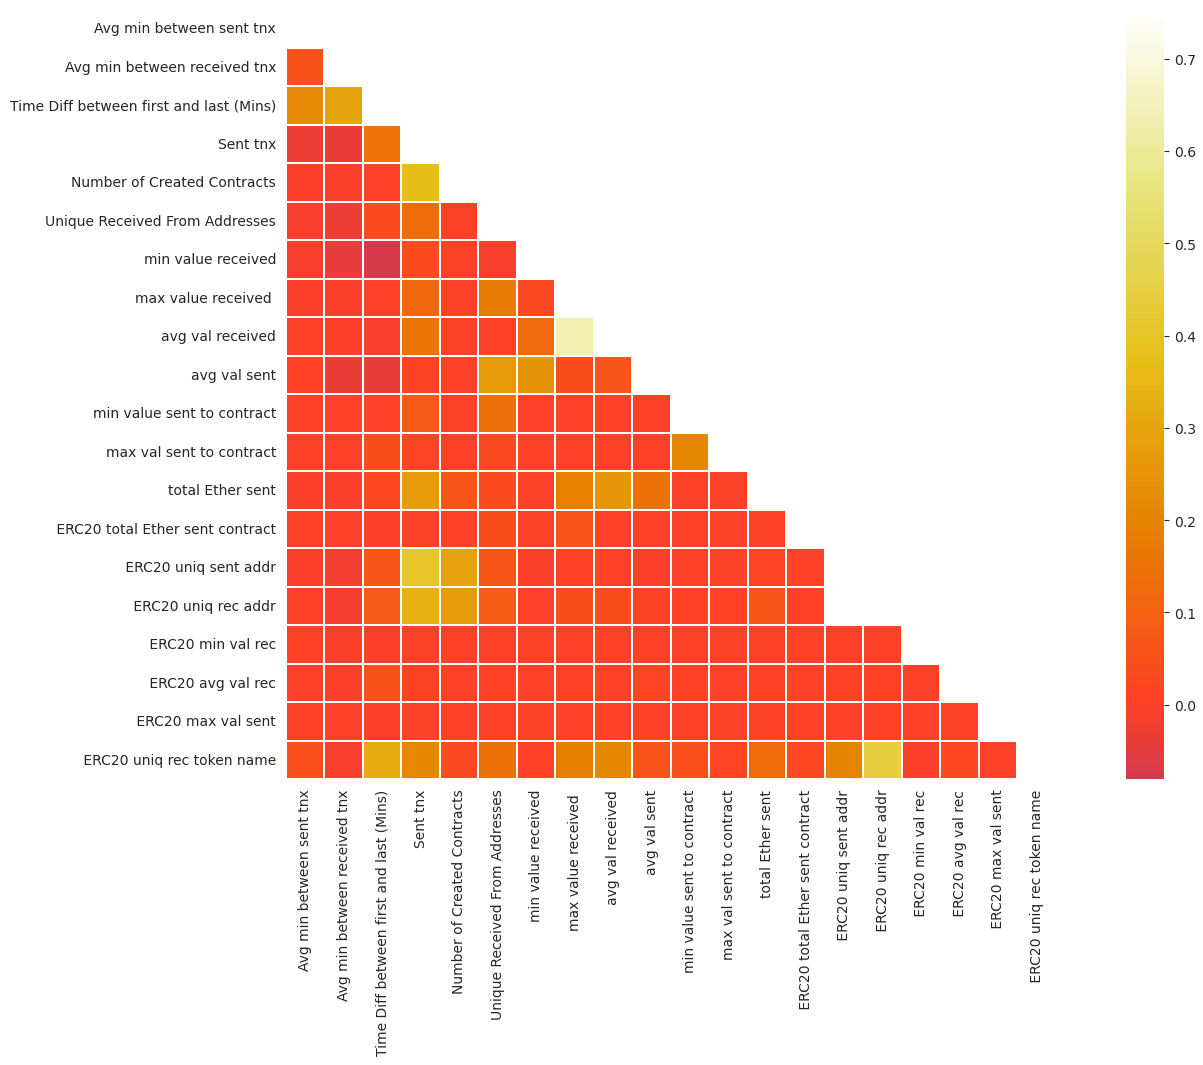

In [1731]:
corr = X_train[num_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

#### Take a look at the dimensions of the features again

In [1732]:
X_train[num_cols].nunique()

Avg min between sent tnx                   4209
Avg min between received tnx               5041
Time Diff between first and last (Mins)    6451
Sent tnx                                    568
Number of Created Contracts                  18
Unique Received From Addresses              223
min value received                         3800
max value received                         5140
avg val received                           5500
avg val sent                               4792
min value sent to contract                    2
max val sent to contract                      3
total Ether sent                           4808
 ERC20 total Ether sent contract             22
 ERC20 uniq sent addr                       102
 ERC20 uniq rec addr                        144
 ERC20 min val rec                         1016
 ERC20 avg val rec                         2731
 ERC20 max val sent                         941
 ERC20 uniq rec token name                  115
dtype: int64

Take a closer look at the numerical features with a very low dimension

In [1733]:
X_train['min value sent to contract'].value_counts()

0.00    7969
0.01       1
Name: min value sent to contract, dtype: int64

In [1734]:
X_train['max val sent to contract'].value_counts()

0.000000    7968
0.046029       1
0.010000       1
Name: max val sent to contract, dtype: int64

Drop these columns as most observations are valued at 0

In [1735]:
drop = ['min value sent to contract','max val sent to contract', ' ERC20 total Ether sent contract']
X_train.drop(columns=drop, inplace=True)
num_cols = [x for x in num_cols if x not in drop]

#do the same for val and test
X_val.drop(columns=drop, inplace=True)
X_test.drop(columns=drop, inplace=True)

Number of created contracts also have a small variation in values

In [1736]:
X_train['Number of Created Contracts'].value_counts()

0       6911
1       1033
3          6
2          5
4          2
3900       1
1180       1
2404       1
6453       1
2096       1
6          1
3521       1
3128       1
2550       1
16         1
19         1
5          1
41         1
Name: Number of Created Contracts, dtype: int64

Observe, that most instances either have created or never did create a contract. Create a binary variable from Number of Created Contracts

In [1737]:
X_train['hasCreatedContracts'] = X_train['Number of Created Contracts'].apply(lambda x: x if x < 1 else 1)
X_train.drop(columns='Number of Created Contracts',inplace=True)

#do the same for test and val
X_val['hasCreatedContracts'] = X_val['Number of Created Contracts'].apply(lambda x: x if x < 1 else 1)
X_val.drop(columns='Number of Created Contracts',inplace=True)

X_test['hasCreatedContracts'] = X_test['Number of Created Contracts'].apply(lambda x: x if x < 1 else 1)
X_test.drop(columns='Number of Created Contracts',inplace=True)

In [1738]:
#update the num and cat cols
num_cols.remove('Number of Created Contracts')
cat_cols.append('hasCreatedContracts')

In [1739]:
num_cols

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Unique Received From Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'avg val sent',
 'total Ether sent',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 min val rec',
 ' ERC20 avg val rec',
 ' ERC20 max val sent',
 ' ERC20 uniq rec token name']

Take a look at the Nominal variables

In [1740]:
X_train[' ERC20 most sent token type'].value_counts().sort_values(ascending=False)

0                3596
None             1470
                  953
EOS               116
OmiseGO           111
                 ... 
Republic            1
Enigma              1
BinaryCoin          1
PangeaCoinICO       1
''                  1
Name:  ERC20 most sent token type, Length: 267, dtype: int64

In [1741]:
X_train[' ERC20 most sent token type'].value_counts().sort_values(ascending=False).index

Index(['0', 'None', ' ', 'EOS', 'OmiseGO', 'blockwell.ai KYC Casper Token',
       'Golem', 'StatusNetwork', 'Qtum', 'BAT',
       ...
       'Maker', 'Yun Planet', 'Cryptonex', 'Nexium', 'Trade', 'Republic',
       'Enigma', 'BinaryCoin', 'PangeaCoinICO', ''''],
      dtype='object', length=267)

Notice how some names are '' or just an empty space. These are technically missing values as well. Group all these under 'Unknown'

In [1742]:
#Relabel all those that are missing but labelled differently under the name "Unknown"
X_train[' ERC20 most sent token type']=X_train[' ERC20 most sent token type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None'] else x)

#do the same for val and test
X_val[' ERC20 most sent token type']=X_val[' ERC20 most sent token type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None'] else x)
X_test[' ERC20 most sent token type']=X_test[' ERC20 most sent token type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None'] else x)

Do the same for ERC20 most received token type

In [1743]:
X_train[' ERC20_most_rec_token_type'].value_counts().sort_values(ascending=False).index

#do the same for val and test
X_val[' ERC20_most_rec_token_type'].value_counts().sort_values(ascending=False).index
X_val[' ERC20_most_rec_token_type'].value_counts().sort_values(ascending=False).index

Index(['0', 'OmiseGO', 'Blockwell say NOTSAFU', 'DATAcoin', 'Livepeer Token',
       'EOS', 'Golem', 'XENON', 'GSENetwork', 'Tronix',
       ...
       'WINGS', 'BMB', 'ethBo', 'Populous', 'Ethos', 'BSB', 'EMO tokens',
       'IOT Chain', 'Frikandel', 'BeautyChain'],
      dtype='object', length=102)

In [1744]:
X_train[' ERC20_most_rec_token_type']=X_train[' ERC20_most_rec_token_type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None',np.nan] else x)

#do the same for val and test
X_val[' ERC20_most_rec_token_type']=X_val[' ERC20_most_rec_token_type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None',np.nan] else x)
X_test[' ERC20_most_rec_token_type']=X_test[' ERC20_most_rec_token_type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None',np.nan] else x)

Also notice how a lot of the coins have very low occurences, we need to take this into account when using the one-hot-encoder, by setting a min frequency

Dealing with skewed numerical columns

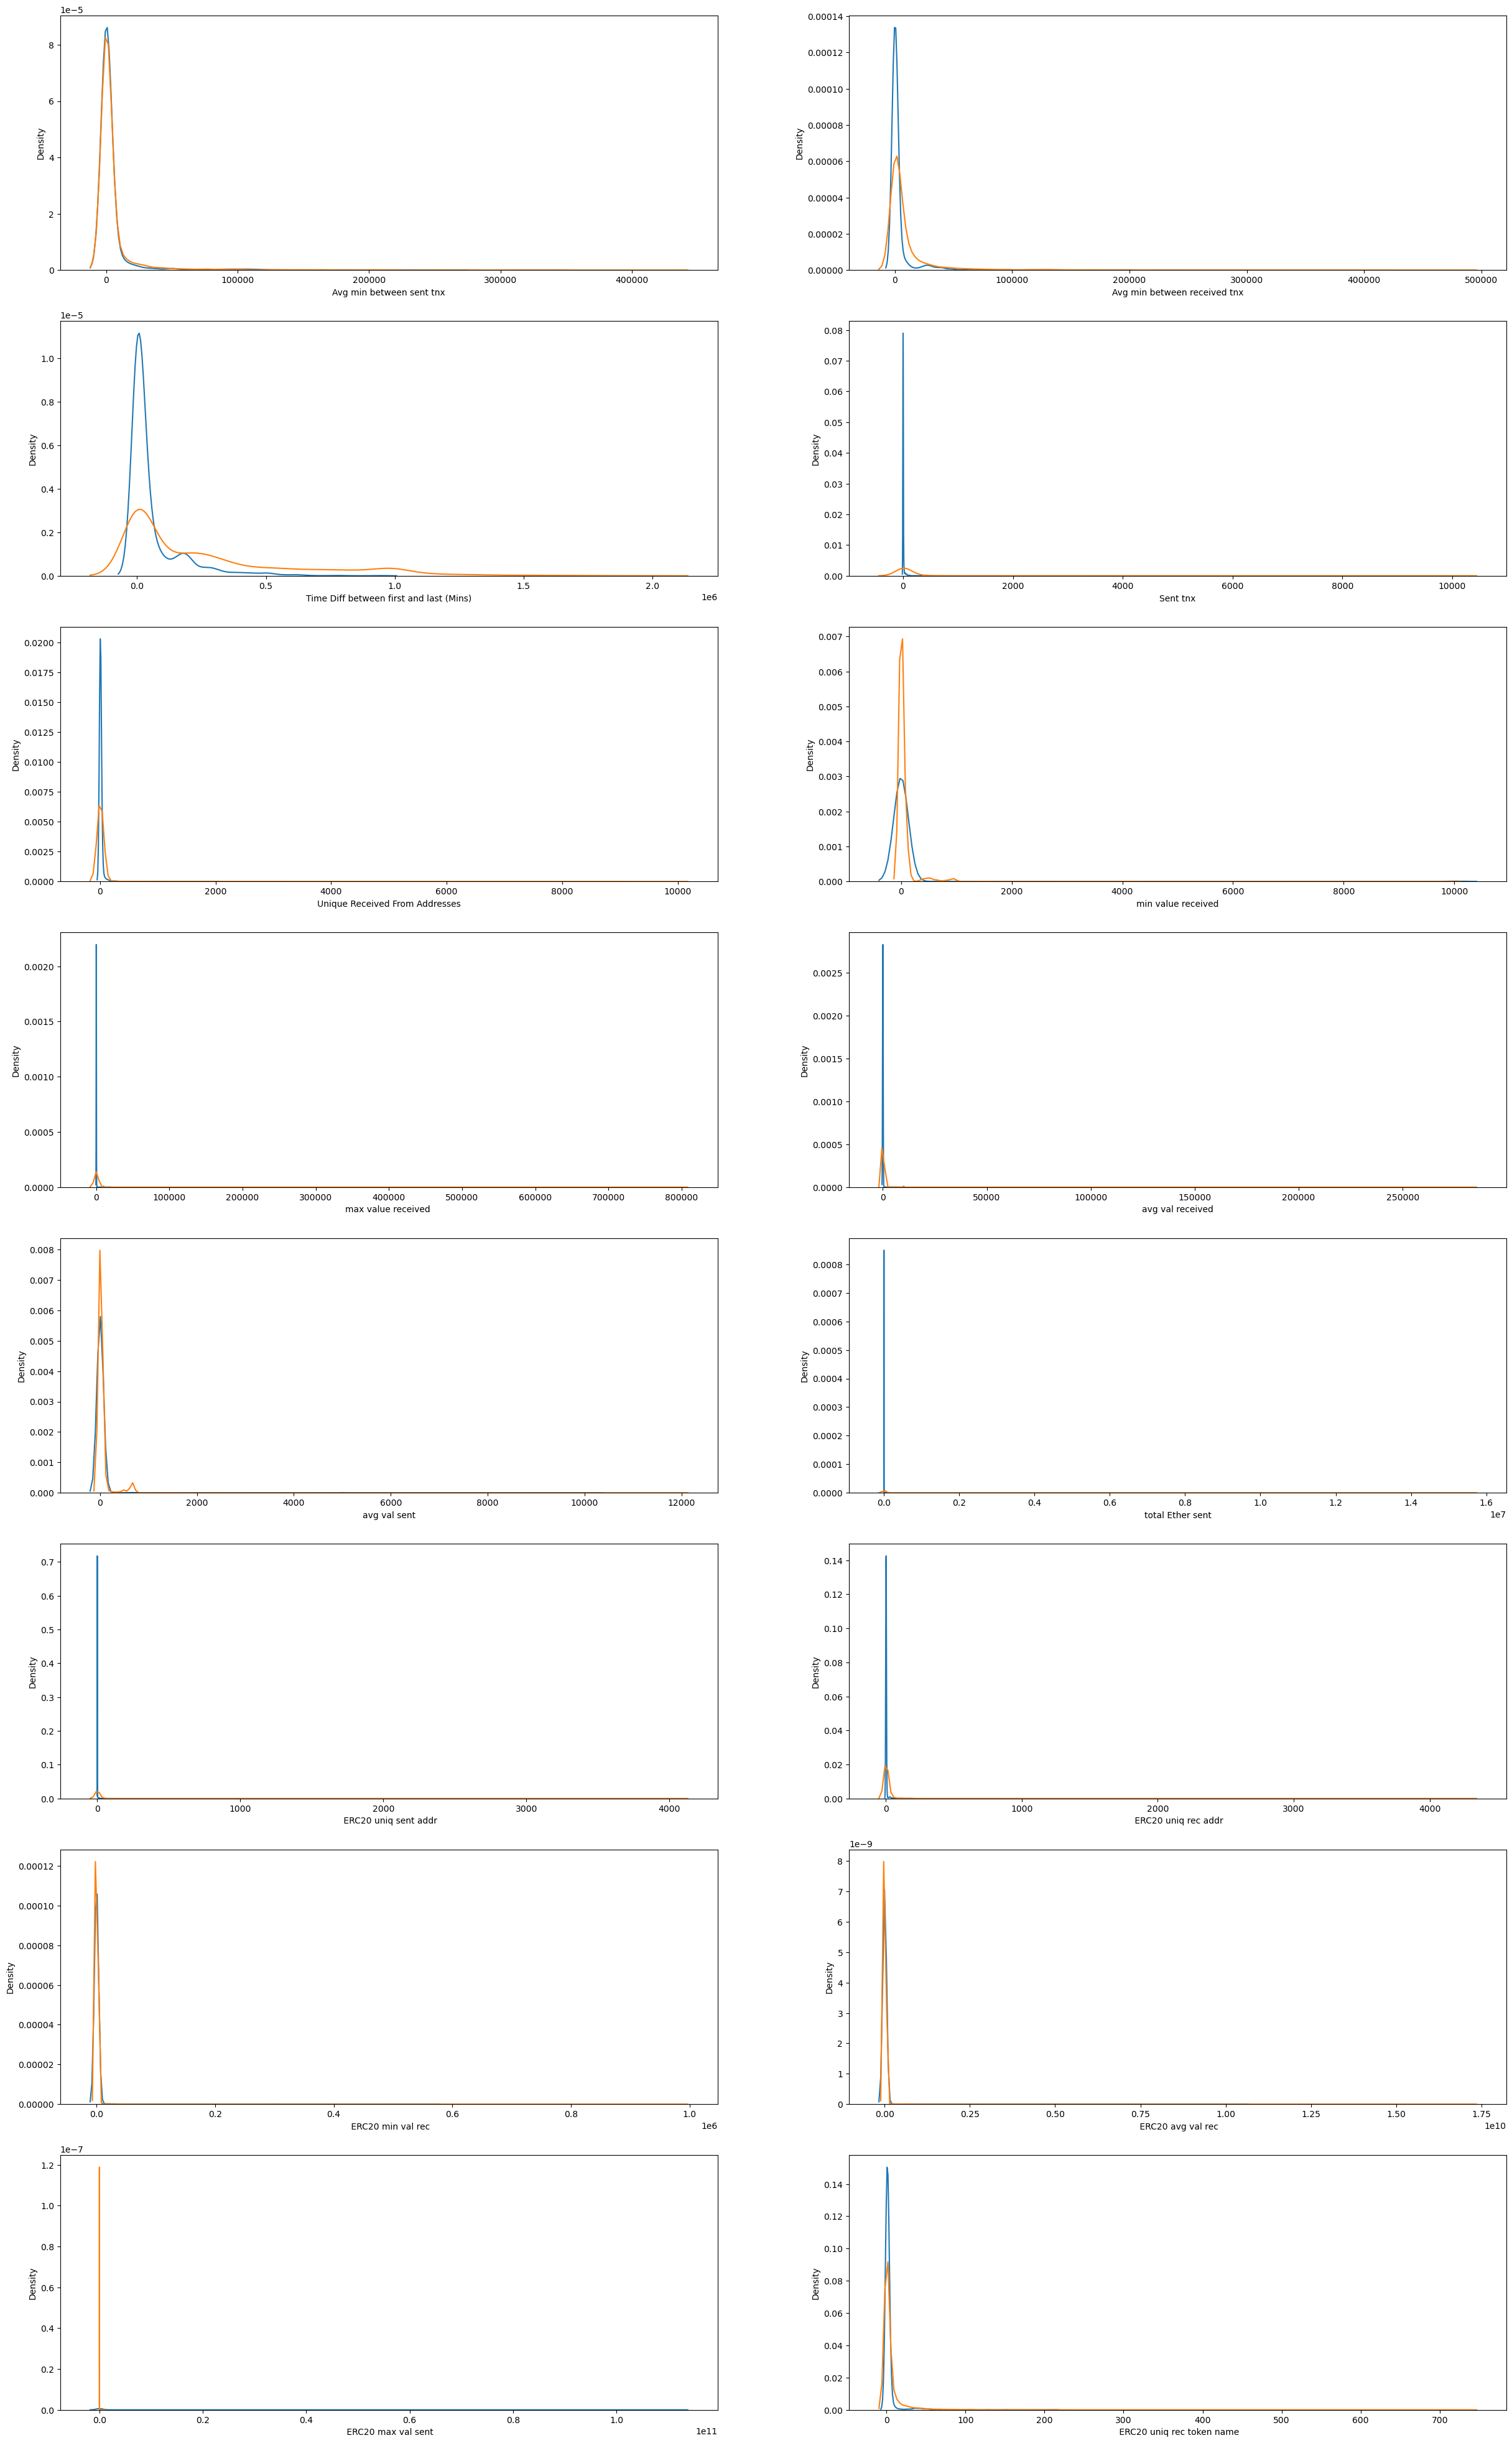

In [1745]:
n = num_cols.__len__()
fig, axes = plt.subplots(int(np.ceil(n/2)),2,figsize=(30,50))
for i in range(n):
    ax = axes[i//2][i%2]
    sns.kdeplot(data=X_train[y_train==1], x=num_cols[i],ax=ax)
    sns.kdeplot(data=X_train[y_train==0], x=num_cols[i],ax=ax)
plt.show()

Notice how all the numerical variables are skewed to the right with a lot of extreme outliers. We need to take this into account when scaling

### Prepping all the transformers and vectorizers using Train set ONLY

In [1746]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer().fit(X_train[num_cols])
X_train_trans = X_train.copy()
X_train_trans[num_cols] = transformer.transform(X_train[num_cols])

In [1747]:
from sklearn.preprocessing import OneHotEncoder
rec_sent_enc = OneHotEncoder(categories='auto', max_categories=21,handle_unknown='infrequent_if_exist')
rec_sent_enc.fit(X_train[cat_cols])
feature_names = rec_sent_enc.get_feature_names_out()

In [1748]:
X_train_trans.drop(columns=cat_cols,inplace=True)

In [1749]:
rec_sent_trans = rec_sent_enc.transform(X_train[cat_cols]).toarray()
X_train_trans[feature_names] = rec_sent_trans

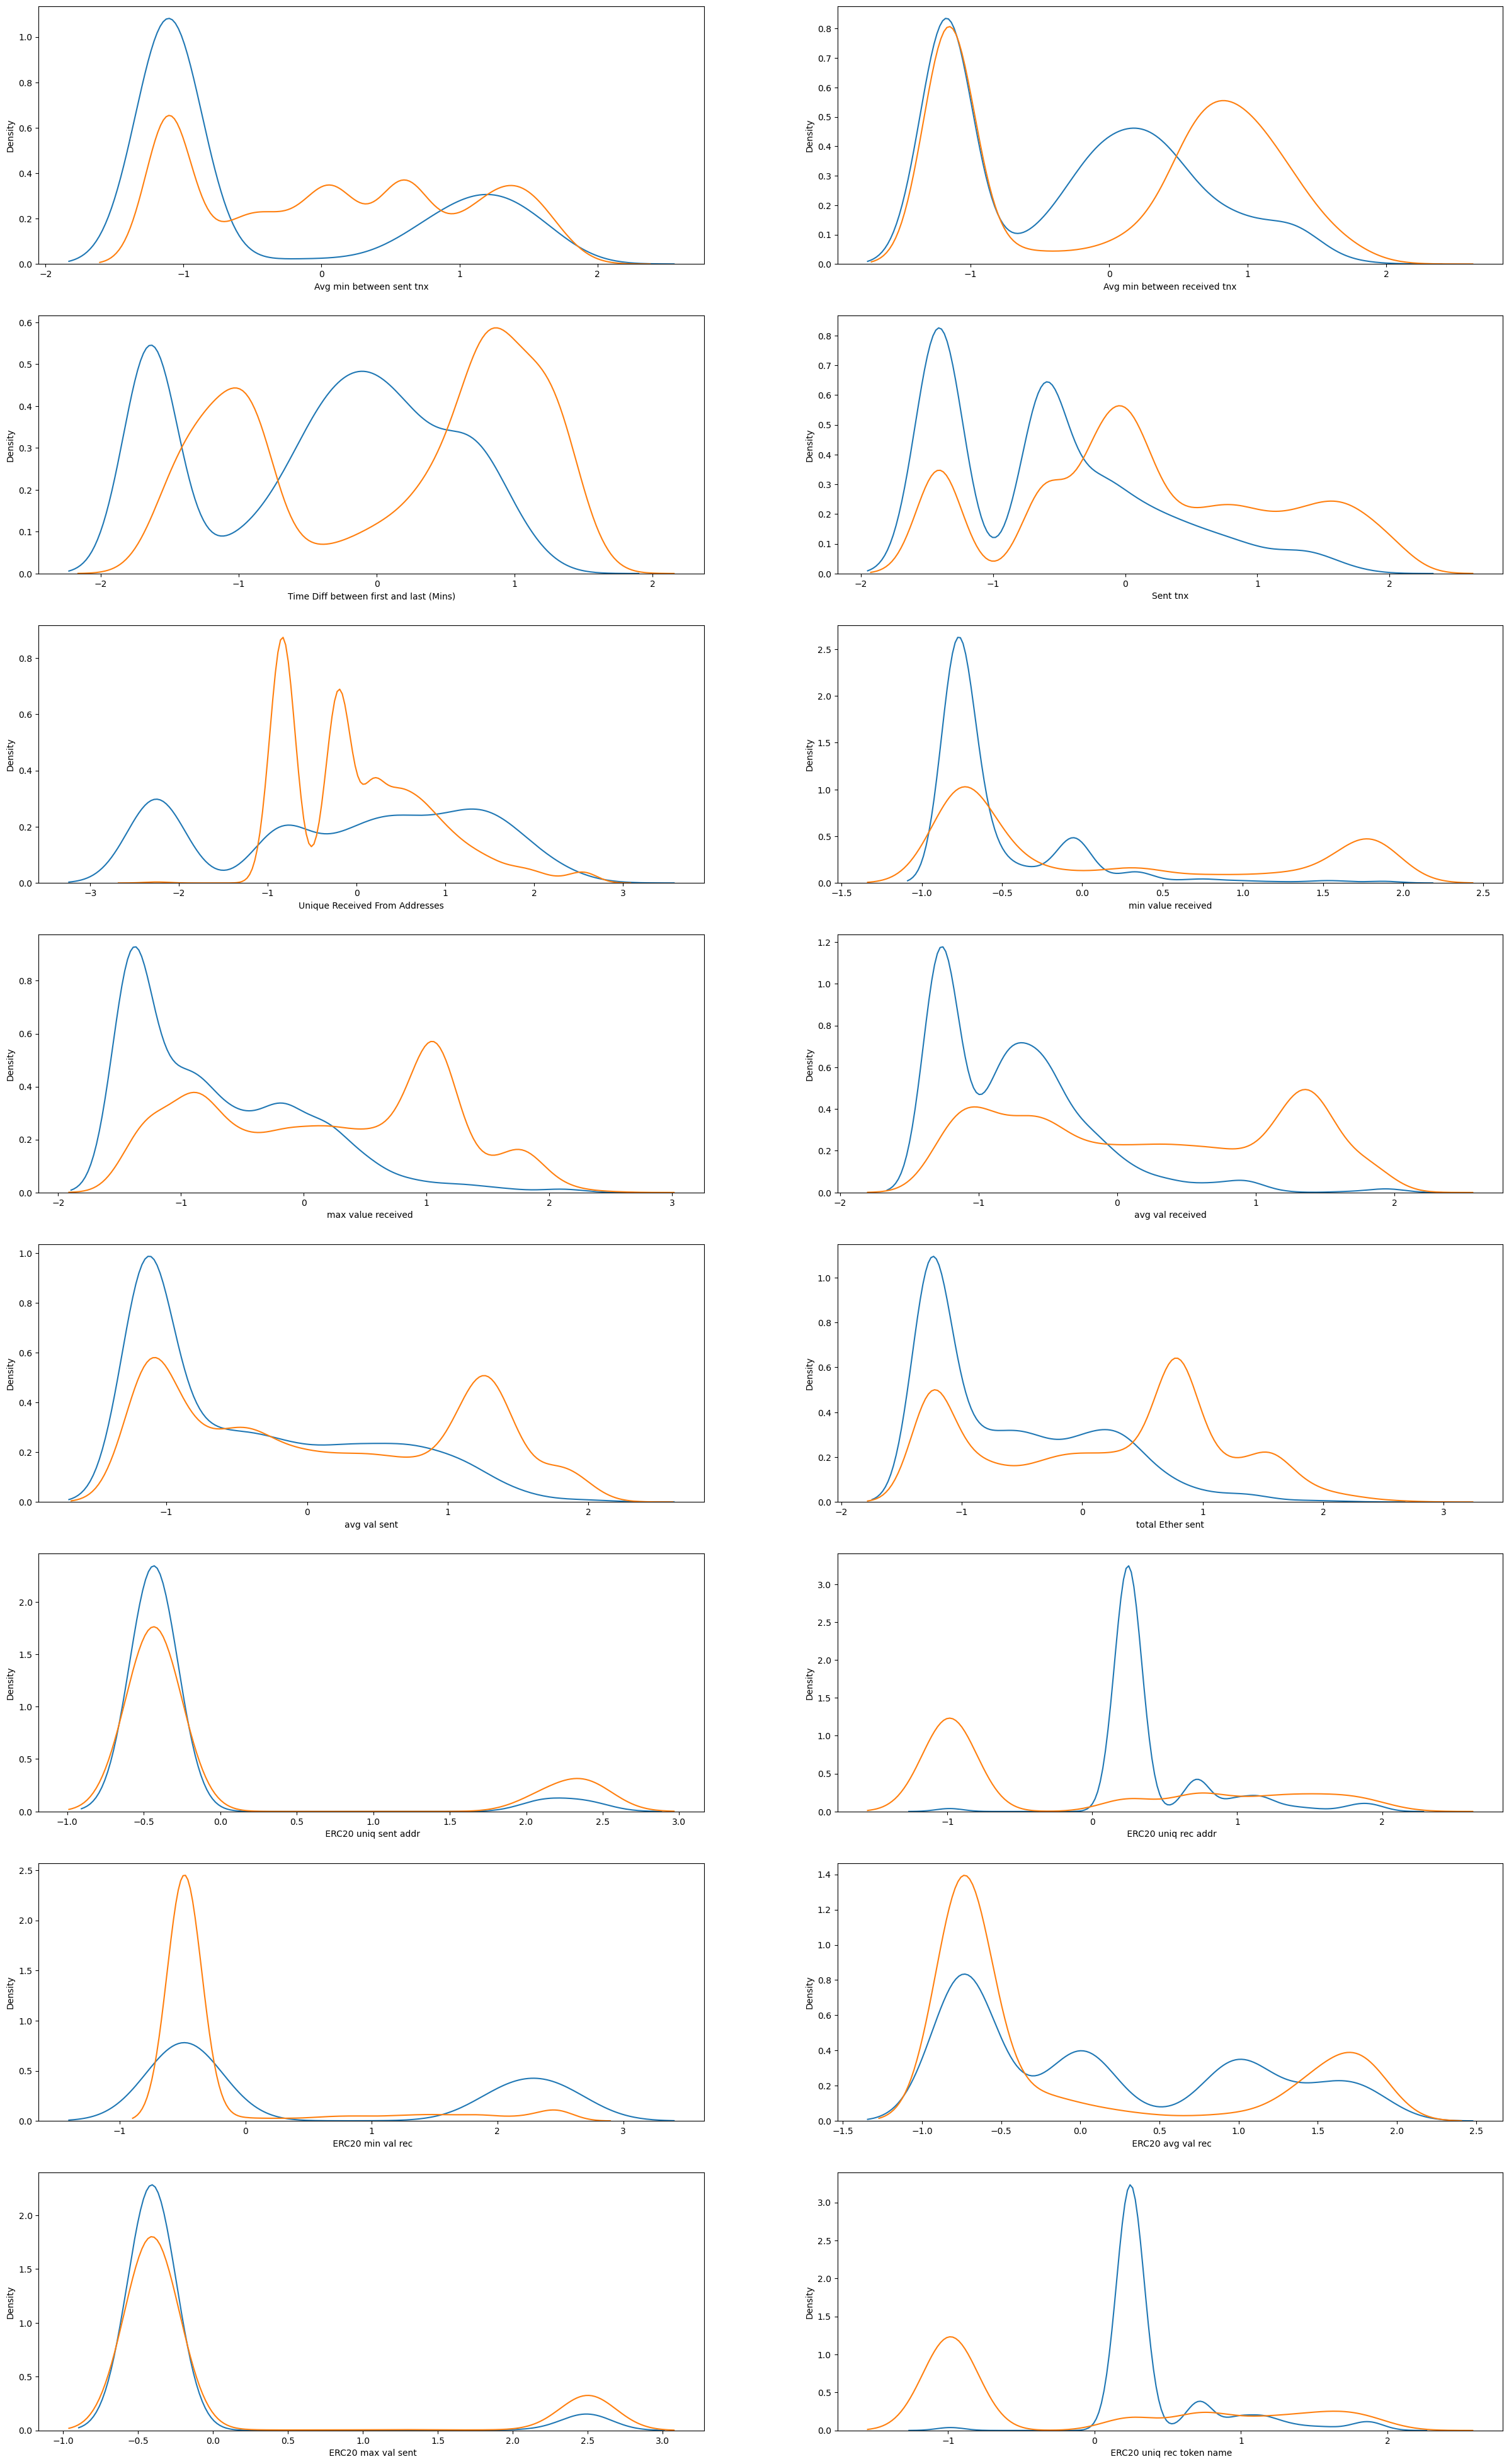

In [1750]:
n = num_cols.__len__()
fig, axes = plt.subplots(int(np.ceil(n/2)),2,figsize=(30,50))
for i in range(n):
    ax = axes[i//2][i%2]
    sns.kdeplot(data=X_train_trans[y_train==1], x=num_cols[i],ax=ax)
    sns.kdeplot(data=X_train_trans[y_train==0], x=num_cols[i],ax=ax)
plt.show()

In [1751]:
X_train_trans.describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Unique Received From Addresses,min value received,max value received,avg val received,avg val sent,total Ether sent,...,ERC20_most_rec_token_type_Unknown,ERC20_most_rec_token_type_VIU,ERC20_most_rec_token_type_XENON,ERC20_most_rec_token_type_blockwell.ai KYC Casper Token,ERC20_most_rec_token_type_www.pnztrust.com,ERC20_most_rec_token_type_infrequent_sklearn,ERC-20 info all NA_0,ERC-20 info all NA_1,hasCreatedContracts_0,hasCreatedContracts_1
count,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,7.970000e+03,...,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000
mean,-9.539281e-17,8.915216e-18,1.025250e-17,9.271825e-17,4.546760e-17,1.337282e-17,-1.872195e-17,-1.992551e-16,-1.132232e-16,-2.763717e-17,...,0.542911,0.005019,0.014680,0.006524,0.003011,0.131995,0.911794,0.088206,0.867127,0.132873
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,0.498187,0.070670,0.120276,0.080515,0.054796,0.338507,0.283612,0.283612,0.339459,0.339459
min,-1.107306e+00,-1.178208e+00,-1.641510e+00,-1.408911e+00,-2.255217e+00,-7.831380e-01,-1.403279e+00,-1.280364e+00,-1.144955e+00,-1.258900e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.107306e+00,-1.178208e+00,-9.057647e-01,-6.071540e-01,-8.344850e-01,-7.807124e-01,-8.686641e-01,-8.756496e-01,-1.039654e+00,-1.120322e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,8.317339e-03,2.714135e-01,2.473792e-01,1.888814e-02,-1.999613e-01,-5.924335e-01,-6.940147e-02,-2.632937e-01,-2.041329e-01,4.680600e-02,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,9.198514e-01,8.782516e-01,8.685209e-01,7.423761e-01,6.333768e-01,7.593484e-01,9.608246e-01,1.002392e+00,1.060133e+00,7.829409e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.881643e+00,2.084611e+00,1.631101e+00,2.112714e+00,2.659077e+00,1.879361e+00,2.507332e+00,2.045099e+00,2.067347e+00,2.717640e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1752]:
X_train_trans['FLAG'] = y_train
X_train_trans.to_csv('train_trans.csv')

### Apply the trained transformers to validation and test sets

In [1753]:
X_val_trans = X_val.copy()
X_val_trans[num_cols] = transformer.transform(X_val[num_cols])
X_val_trans.drop(columns=cat_cols,inplace=True)
X_val_trans[feature_names] = rec_sent_enc.transform(X_val[cat_cols]).toarray()
X_val_trans['FLAG'] = y_val
X_val_trans.to_csv('val_trans.csv')

In [1754]:
X_test_trans = X_test.copy()
X_test_trans[num_cols] = transformer.transform(X_test[num_cols])
X_test_trans.drop(columns=cat_cols,inplace=True)
X_test_trans[feature_names] = rec_sent_enc.transform(X_test[cat_cols]).toarray()
X_test_trans['FLAG'] = y_test
X_test_trans.to_csv('test_trans.csv')

In [1755]:
X_train_trans.shape,X_test_trans.shape,X_val_trans.shape

((7970, 63), (985, 63), (886, 63))

In [1756]:
X_val_trans.columns[X_val_trans.isna().sum()>0]

Index([], dtype='object')

In [1703]:
X_test_trans.columns[X_val_trans.isna().sum()>0]

Index([], dtype='object')